# Module D: Nick's EDA

In [6]:
import os
import pathlib
working_dir = pathlib.Path().absolute()
os.chdir(working_dir)

In [2]:
import pandas as pd
import numpy as np

from matplotlib import pyplot
import matplotlib.pylab as plt 
%matplotlib inline

from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [3]:
# our data is missing Florida?
state_names = ["Alaska", "Alabama", "Arkansas", "Arizona", "California", "Colorado",
               "Connecticut", "District of Columbia", "Delaware", "Georgia",
               "Hawaii", "Iowa", "Idaho", "Illinois", "Indiana", "Kansas", "Kentucky", "Louisiana",
               "Massachusetts", "Maryland", "Maine", "Michigan", "Minnesota", "Missouri", "Mississippi",
               "Montana", "North Carolina", "North Dakota", "Nebraska", "New Hampshire", "New Jersey", 
               "New Mexico", "Nevada", "New York", "Ohio", "Oklahoma", "Oregon", "Pennsylvania", 
               "Puerto Rico", "Rhode Island", "South Carolina", "South Dakota", "Tennessee", "Texas", 
               "Utah", "Virginia", "Virgin Islands", "Vermont", "Washington", "Wisconsin", "West Virginia",
               "Wyoming"]

dateparse = lambda x: pd.datetime.strptime(x + '-1', '%Y-%U-%w')

df_lst = []
for state in state_names:
    df = pd.read_csv('data/flu_ground_truth/wILI_cleaned_' + state + '.csv', parse_dates=['time'], date_parser=dateparse)
    df['state'] = state
    df_lst.append(df)
    
wili = pd.concat(df_lst, axis=0, ignore_index=True)

In [10]:
wili

,time,wili,state
0,2010-10-04,0.875146,Alaska
1,2010-10-11,1.128270,Alaska
2,2010-10-18,0.586042,Alaska
3,2010-10-25,0.967742,Alaska
4,2010-11-01,0.683851,Alaska
...,...,...,...
23759,2019-07-08,0.280899,Wyoming
23760,2019-07-15,0.166021,Wyoming
23761,2019-07-22,0.000100,Wyoming
23762,2019-07-29,0.000100,Wyoming


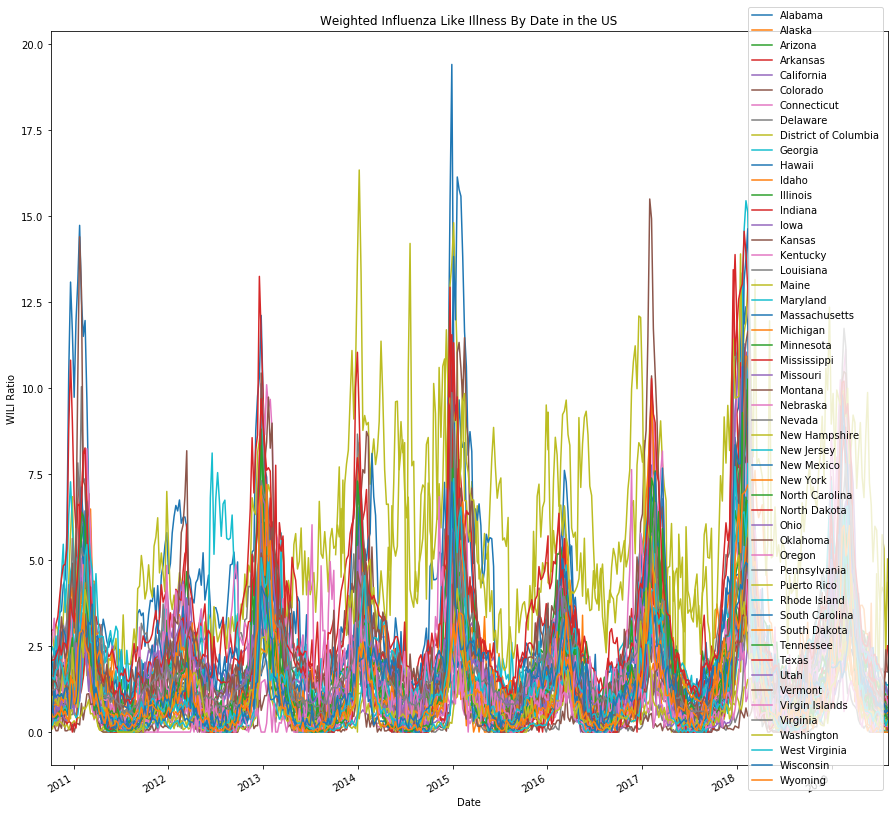

In [11]:
# this is really messy, going to pick 5

fig, ax = plt.subplots(figsize=(15,15))
for key, grp in wili.groupby(['state']):
    ax = grp.plot(ax=ax, kind='line', x='time', y='wili', label=key)

plt.legend(loc='right')
plt.xlabel('Date')
plt.ylabel('WILI Ratio')
plt.title('Weighted Influenza Like Illness By Date in the US')
plt.show()

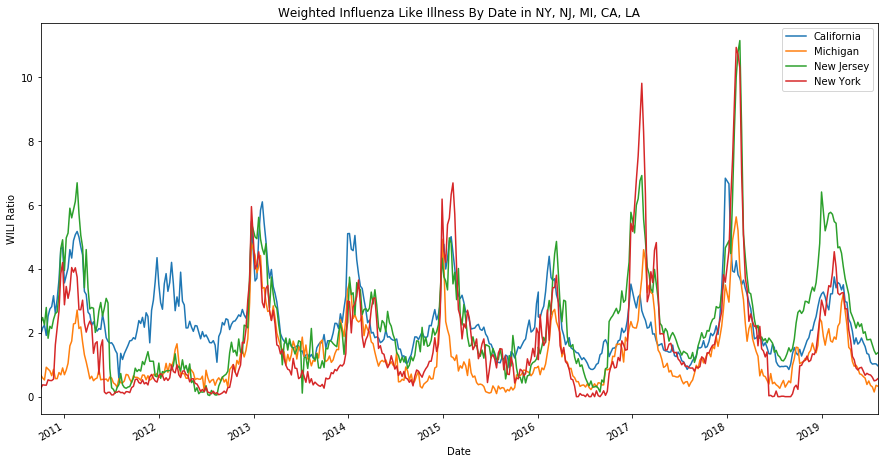

In [6]:
wili_NY_NJ_MI_CA_LA = wili.loc[(wili['state'] == 'New York') | (wili['state'] == 'New Jersey')
                              | (wili['state'] == 'Michigan') | (wili['state'] == 'California')
                              |(wili['state'] == 'Lousiana')]

fig, ax = plt.subplots(figsize=(15,8))
for key, grp in wili_NY_NJ_MI_CA_LA.groupby(['state']):
    ax = grp.plot(ax=ax, kind='line', x='time', y='wili', label=key)

plt.legend(loc='best')
plt.xlabel('Date')
plt.ylabel('WILI Ratio')
plt.title('Weighted Influenza Like Illness By Date in NY, NJ, MI, CA, LA')
plt.show()

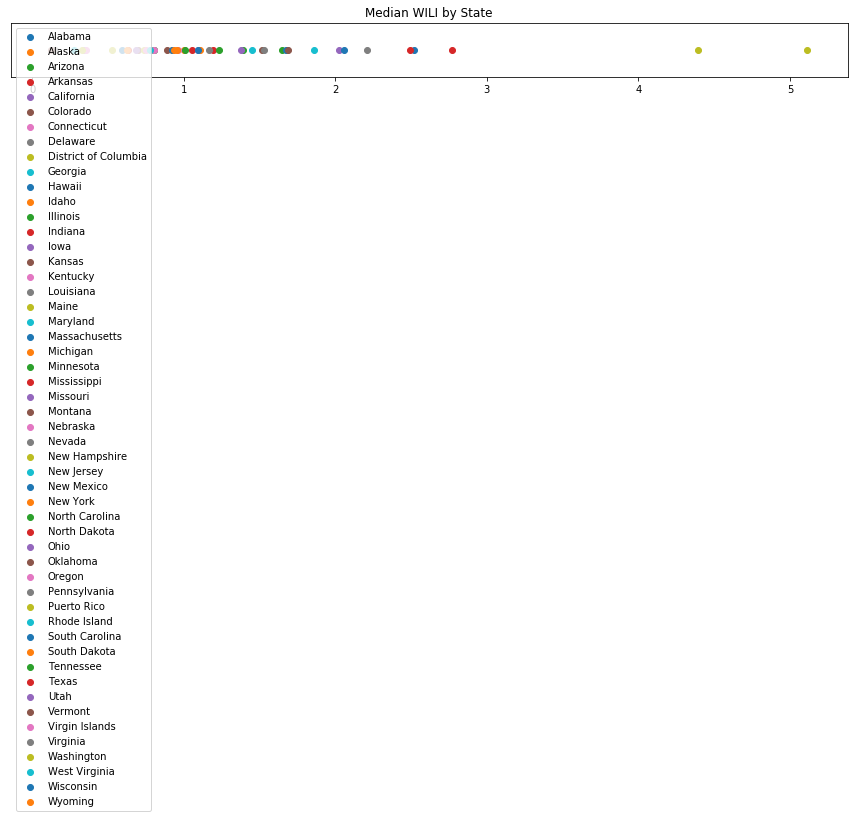

In [7]:
# also messy

fig, ax = plt.subplots(figsize=(15,1))

for key, grp in wili.groupby(['state']):
    mean_wili = grp['wili'].median()
    ax.scatter(mean_wili, 0, label=key)
#     ax = grp.scatter(ax=ax, kind='line', x='time', y='wili', label=key)

plt.legend(loc='upper left')
plt.title('Median WILI by State')
plt.yticks([])
plt.show()

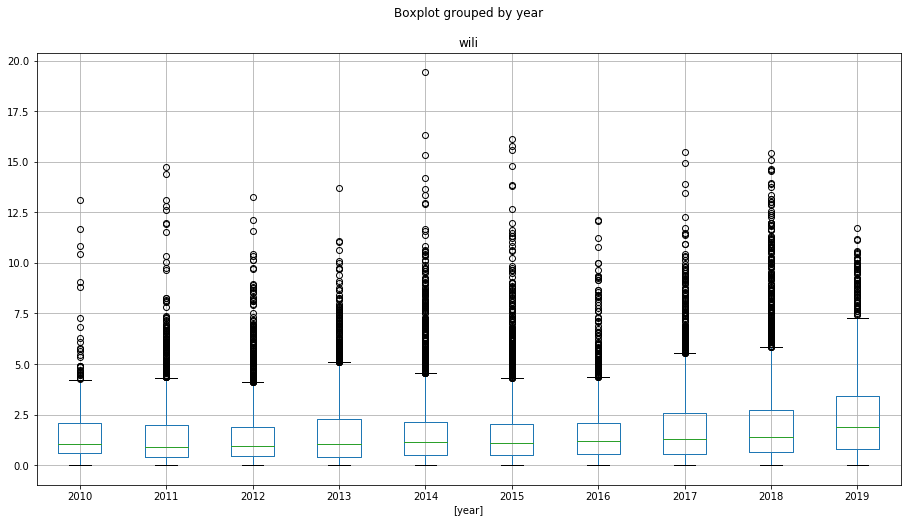

In [8]:
wili['year'] = pd.DatetimeIndex(wili['time']).year
wili.boxplot(by='year', figsize=(15,8))
wili = wili.drop(['year'], axis=1)

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
        35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
        52]), <a list of 52 Text xticklabel objects>)

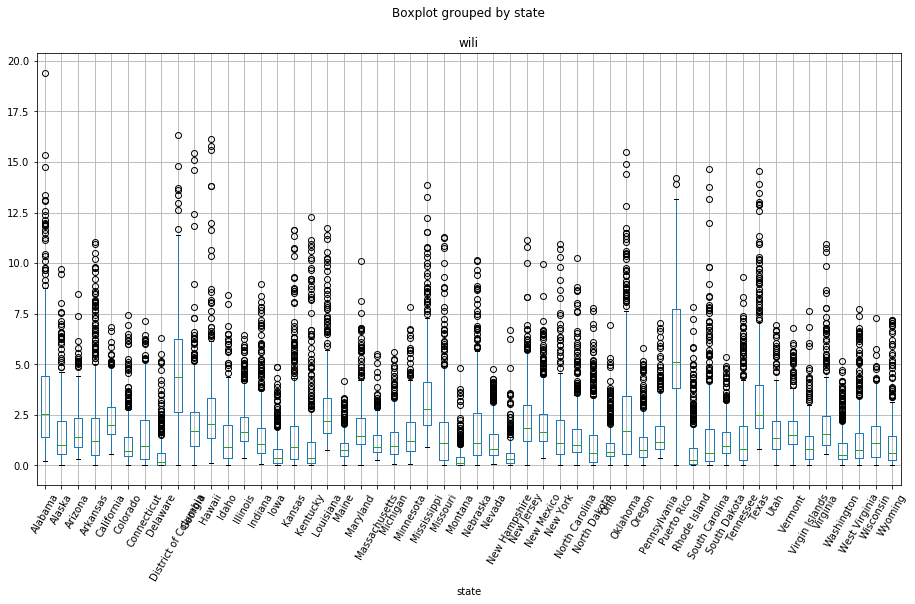

In [9]:
# meds = wili.groupby(['state'], as_index=False).median()
# meds = meds.sort_values(by='wili', ascending=False)
# wili_state_boxplot = wili.iloc[meds.index]

# med = wili.median()
# med.sort_values()
# wili_state_boxplot = wili[med.index]
# wili_state_boxplot

wili.boxplot(column='wili', by='state', figsize=(15,8))
plt.xticks(rotation=60)